# Curso de introducción al análisis y modelado de datos con Python 

<img src="../images/cacheme.png" alt="logo" style="width: 150px;"/>
<img src="../images/aeropython_logo.png" alt="logo" style="width: 115px;"/>

---

# Pandas: Carga y manipulación básica de datos

_Hasta ahora hemos visto varios grupos de estructuras para almacenamiento de datos. Aquellas que nos ofrece Python; integer, real, complex, boolen, list, tuple, dictionary... Los arrays que nos ofrece el paquete `NumPy`, y las matrices dispersas que nos proporciona el paquete `sparse` de `SciPy`._

_En este notebook, vamos a presentar y empezar a trabajar con el paquete `pandas`. En concreto, nos basaremos en algunos problemas para ver las características de sus estructuras de datos, y para aprender a cargar datos y empezar a manipularnos._

---

## ¿Qué es pandas?

`pandas` es una libreria que nos proporciona estructuras de datos y herramientas para realizar análisis de grandes volúmenes de datos de manera rápida.

Se articula sobre la librería `NumPy`, y nos permite enfrentarnos a situaciones en las que tenemos que manejar datos reales, que requieren seguir un proceso de carga, limpieza, filtrado y reducción, y su posterior análisis.

Es de gran utilidad en la industria del Big Data, pues un grandísmo porcentaje del tiempo de trabajo de un Data Scientist, está asociado a la limpieza y preparación de los datos (ver [artículo](https://www.forbes.com/sites/gilpress/2016/03/23/data-preparation-most-time-consuming-least-enjoyable-data-science-task-survey-says/#a5231076f637)), y pandas nos ayuda mucho en esta tarea.  

De manera estándar y por convenio, pandas se importa de la siguiente forma:

In [1]:
import pandas as pd

## Cargando los datos

Trabajaremos sobre un fichero de datos metereológicos de la Consejeria Agricultura, Pesca y Desarrollo Rural de Andalucía.

In [2]:
# preserve
from IPython.display import HTML
HTML('<iframe src="http://www.juntadeandalucia.es/agriculturaypesca/ifapa/ria/servlet/FrontController?action=Static&url=coordenadas.jsp&c_provincia=4&c_estacion=4" width="700" height="400"></iframe>')

Vemos que pinta tiene el fichero:

In [3]:
# en Linux
!head ../data/tabernas_meteo_data.txt

FECHA    DIA Al04TMax Al04TMin Al04TMed Al04Precip 
-------- --- -------- -------- -------- ---------- 

13-12-16 348     14.6      4.0      8.9        0.2 
12-12-16 347     15.9      3.0      8.7        0.2 
11-12-16 346     16.9      5.0     10.2        0.2 
10-12-16 345     16.4      6.3     10.9        0.2 
09-12-16 344     13.6      9.5     11.2        1.8 
08-12-16 343     14.5      5.4     10.4        0.0 
07-12-16 342     15.7      6.1     10.1        0.2 


In [4]:
# en Windows
# !more ..\data\tabernas_meteo_data.txt

Vemos que los datos no están en formato CSV, aunque sí que tienen algo de estructura.

¿Qué sucede si intentamos cargarlos con pandas?

In [5]:
pd.read_csv("../data/tabernas_meteo_data.txt").head(5)

,FECHA DIA Al04TMax Al04TMin Al04TMed Al04Precip
0,-------- --- -------- -------- -------- ------...
1,13-12-16 348 14.6 4.0 8.9 ...
2,12-12-16 347 15.9 3.0 8.7 ...
3,11-12-16 346 16.9 5.0 10.2 ...
4,10-12-16 345 16.4 6.3 10.9 ...


Tenemos que hacer los siguientes cambios:
* Separar los campos por un número arbitrario de espacios en blanco
* Saltar las primeras lineas.
* Dar nombre a las nuevas columnas.
* Descartar columna del día del año (no nos interesa).
* Convertir las fechas al formato correcto.

In [6]:
# leo con el formato adecuado
data = pd.read_csv(
    "../data/tabernas_meteo_data.txt",
    delim_whitespace=True,
    #sep ='\s+',
    usecols=(0, 2, 3, 4, 5),
    skiprows=2,            
    names=['DATE', 'TMAX', 'TMIN', 'TMED', 'PRECIP'],
    parse_dates=['DATE'],
    dayfirst=True,  
    # date_parser=lambda x: pd.datetime.strptime(x, '%d-%m-%Y'), # parseo manual   
    index_col=['DATE']
    )

data.head(5)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2
2016-12-10,16.4,6.3,10.9,0.2
2016-12-09,13.6,9.5,11.2,1.8


<div class="alert alert-info">Para acordarnos de cómo parsear las fechas: http://strftime.org/</div>

## Explorando los datos

In [7]:
# recuperar los tipos de datos de cada columna
data.dtypes

TMAX      float64
TMIN      float64
TMED      float64
PRECIP    float64
dtype: object

In [8]:
data.index

DatetimeIndex(['2016-12-13', '2016-12-12', '2016-12-11', '2016-12-10',
               '2016-12-09', '2016-12-08', '2016-12-07', '2016-12-06',
               '2016-12-05', '2016-12-04',
               ...
               '2004-01-10', '2004-01-09', '2004-01-08', '2004-01-07',
               '2004-01-06', '2004-01-05', '2004-01-04', '2004-01-03',
               '2004-01-02', '2004-01-01'],
              dtype='datetime64[ns]', name='DATE', length=4732, freq=None)

In [9]:
# Muestro solo las primers 4 líneas
data.head(4)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-13,14.6,4.0,8.9,0.2
2016-12-12,15.9,3.0,8.7,0.2
2016-12-11,16.9,5.0,10.2,0.2
2016-12-10,16.4,6.3,10.9,0.2


In [10]:
# Muestro sólo las últimas 6 líneas
data.tail(6)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-01-06,NaN,NaN,NaN,NaN
2004-01-05,16.4,0.6,7.1,0.0
2004-01-04,16.2,-0.4,7.2,0.0
2004-01-03,15.1,0.8,7.9,0.0
2004-01-02,17.4,5.7,10.6,0.0
2004-01-01,18.0,2.5,11.1,0.0


In [11]:
# Muestro sólo determinadas líneas
data[1:4:2]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-12,15.9,3.0,8.7,0.2
2016-12-10,16.4,6.3,10.9,0.2


In [12]:
# Ordeno de índice más antiguo a más moderno
data.sort_index(inplace=True)
data.head(5)

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-01-01,18.0,2.5,11.1,0.0
2004-01-02,17.4,5.7,10.6,0.0
2004-01-03,15.1,0.8,7.9,0.0
2004-01-04,16.2,-0.4,7.2,0.0
2004-01-05,16.4,0.6,7.1,0.0


In [13]:
# Ordeno de mayor a menor la temperatura media
data.sort_values('TMED', inplace=True, ascending=False)
data.head()

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-08-24,41.2,23.8,32.1,0.0
2012-08-12,41.6,21.0,31.7,0.0
2005-07-17,41.9,21.3,31.7,0.0
2004-07-24,39.0,23.4,31.4,0.0
2009-07-24,42.6,20.1,31.4,0.0


In [14]:
# Información general del dataset. 
# Cuidado, para cada columna son las filas con elementos
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4732 entries, 2004-08-24 to 2015-12-31
Data columns (total 4 columns):
TMAX      4712 non-null float64
TMIN      4712 non-null float64
TMED      4712 non-null float64
PRECIP    4711 non-null float64
dtypes: float64(4)
memory usage: 184.8 KB


In [15]:
# Numero de filas y columnas en el dataset
data.shape

(4732, 4)

In [16]:
# contamos cuantos elementos tenemos sin valor
data.isnull().sum()

TMAX      20
TMIN      20
TMED      20
PRECIP    21
dtype: int64

In [17]:
# contamos cuantos elementos tenemos con valor
data.count(axis=0)

TMAX      4712
TMIN      4712
TMED      4712
PRECIP    4711
dtype: int64

### Descripción estadística

Se pueden pedir los datos estadísticos asociados al dataframe.

In [18]:
# Descripción estadística
data.describe()

,TMAX,TMIN,TMED,PRECIP
count,4712.000000,4712.000000,4712.000000,4711.000000
mean,23.226188,9.678841,16.278332,0.643940
std,7.318777,6.262509,6.637797,3.240754
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.300000,4.500000,10.600000,0.000000
50%,22.900000,9.700000,16.000000,0.000000
75%,29.200000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


Por defecto, los elementos con NA no se tienen en cuenta a la hora de calcular los valores. Se puede comprobar viendo como cambian los datos cuando se sustitiyen con ceros.

In [19]:
# Cambiar NA por ceros y volver a ver la descripción estadística
# recuerda que esto no cambia data en realidad, porque no lo hemos guardado
data.fillna(0).describe()

,TMAX,TMIN,TMED,PRECIP
count,4732.000000,4732.000000,4732.000000,4732.000000
mean,23.128022,9.637933,16.209531,0.641082
std,7.457140,6.280731,6.707426,3.233837
min,0.000000,-8.200000,-14.900000,0.000000
25%,17.200000,4.400000,10.500000,0.000000
50%,22.850000,9.700000,16.000000,0.000000
75%,29.100000,15.100000,22.100000,0.000000
max,42.600000,23.800000,32.100000,66.200000


Otra forma de acceder a los datos estadísticos, es pedirlos de forma directa.

In [20]:
data.mean()

TMAX      23.226188
TMIN       9.678841
TMED      16.278332
PRECIP     0.643940
dtype: float64

In [21]:
data.quantile(0.25)

TMAX      17.3
TMIN       4.5
TMED      10.6
PRECIP     0.0
Name: 0.25, dtype: float64

## Accediendo a los datos.

Tenemos dos funciones principales para acceder a los datos, que son `.loc` que permite acceder por etiquetas, y `.iloc`que permite acceder por índices. 

##### columnas

Hay varias formas de acceder a las columnas: por nombre o por atributo (si no contienen espacios ni caracteres especiales).


In [22]:
# accediendo a una columna por el nombre (label) y obteniendo una serie
data['TMAX'].head()

DATE
2004-08-24    41.2
2012-08-12    41.6
2005-07-17    41.9
2004-07-24    39.0
2009-07-24    42.6
Name: TMAX, dtype: float64

In [23]:
# accediendo a una columna por el nombre (label) y obteniendo un dataframe.
data[['TMAX']].head()

,TMAX
DATE,
2004-08-24,41.2
2012-08-12,41.6
2005-07-17,41.9
2004-07-24,39.0
2009-07-24,42.6


In [24]:
# accediendo a varias columnas por el nombre (lable)
data[['TMAX', 'TMED']].head()

,TMAX,TMED
DATE,,
2004-08-24,41.2,32.1
2012-08-12,41.6,31.7
2005-07-17,41.9,31.7
2004-07-24,39.0,31.4
2009-07-24,42.6,31.4


In [25]:
# accediendo a una columna por el atributo
data.TMED.head()

DATE
2004-08-24    32.1
2012-08-12    31.7
2005-07-17    31.7
2004-07-24    31.4
2009-07-24    31.4
Name: TMED, dtype: float64

##### filas

Para acceder a las filas tenemos dos métodos: `.loc` (basado en etiquetas), `.iloc` (basado en posiciones enteras).

In [26]:
# accediendo a una fila por etiqueta y obteniendo una serie
data.loc[pd.to_datetime("2016-09-02")]

TMAX      31.8
TMIN      16.3
TMED      23.2
PRECIP     0.0
Name: 2016-09-02 00:00:00, dtype: float64

In [27]:
# accediendo a una fila por etiqueta y obteniendo un dataframe
data.loc[[pd.to_datetime("2016-09-02")]]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-09-02,31.8,16.3,23.2,0.0


In [28]:
# accediendo a varias filas por etiqueta
data.loc[[pd.to_datetime("2016-12-01"), pd.to_datetime("2016-12-03")]]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-12-01,13.6,9.2,11.1,3.2
2016-12-03,13.4,8.7,11.1,1.0


In [29]:
# accediendo a una fila por índice y obteniendo una serie
data.iloc[1]

TMAX      41.6
TMIN      21.0
TMED      31.7
PRECIP     0.0
Name: 2012-08-12 00:00:00, dtype: float64

In [30]:
# accediendo a una fila por índice y obteniendo un dataframe
data.iloc[[1]]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2012-08-12,41.6,21.0,31.7,0.0


In [31]:
# accediendo a varias filas por indice
data.iloc[1:10:3]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2012-08-12,41.6,21.0,31.7,0.0
2009-07-24,42.6,20.1,31.4,0.0
2015-07-08,41.1,20.2,30.8,0.0


##### filas y columnas 

In [32]:
data.loc[[pd.to_datetime("2016-12-01"), pd.to_datetime("2016-12-03")], ["TMAX", "TMIN"]]

,TMAX,TMIN
DATE,,
2016-12-01,13.6,9.2
2016-12-03,13.4,8.7


In [33]:
data.iloc[[1,10,3], [2, 3]]

,TMED,PRECIP
DATE,,
2012-08-12,31.7,0.0
2016-07-31,30.4,0.0
2004-07-24,31.4,0.0


## Filtrado de datos

In [34]:
# busco duplicados en las fechas
data[data.index.duplicated()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2015-12-29,18.7,3.4,9.7,0.0


In [35]:
# TMax > 40
data[data['TMAX']> 40]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2004-08-24,41.2,23.8,32.1,0.0
2012-08-12,41.6,21.0,31.7,0.0
2005-07-17,41.9,21.3,31.7,0.0
2009-07-24,42.6,20.1,31.4,0.0
2009-07-22,41.3,20.3,31.0,0.0
2012-06-28,40.5,20.0,30.9,0.0
2015-07-08,41.1,20.2,30.8,0.0
2009-07-23,40.6,20.0,30.6,0.0
2010-08-27,42.4,17.5,29.8,0.0


In [36]:
# 0<TMin< 2
data[(-10<data['TMIN']) & (data['TMIN']< -5)]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2012-02-05,11.5,-5.3,5.9,0.0
2012-02-14,13.1,-5.3,5.3,0.0
2014-12-31,14.3,-5.9,2.9,0.0
2010-12-17,10.5,-5.3,2.8,0.2
2005-01-31,11.4,-5.8,2.8,0.0
2015-02-07,10.6,-5.2,2.2,2.0
2012-02-04,6.5,-6.6,1.9,0.0
2014-12-30,11.5,-6.7,1.5,0.0
2012-02-09,9.9,-6.0,1.4,0.0


In [37]:
# Busqueda de valores nulos
data.loc[data.PRECIP.isnull()]

,TMAX,TMIN,TMED,PRECIP
DATE,,,,
2016-11-22,13.6,7.8,10.1,NaN
2004-01-06,NaN,NaN,NaN,NaN
2005-08-21,NaN,NaN,NaN,NaN
2005-12-22,NaN,NaN,NaN,NaN
2006-01-28,NaN,NaN,NaN,NaN
2006-02-16,NaN,NaN,NaN,NaN
2006-05-11,NaN,NaN,NaN,NaN
2006-06-14,NaN,NaN,NaN,NaN
2007-04-19,NaN,NaN,NaN,NaN


## Representaciones de datos

In [38]:
# Importamos  matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

#### Líneas

/home/asaez/miniconda3/envs/cacheme-datos/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


Text(0.5,1,'Temperaturas')

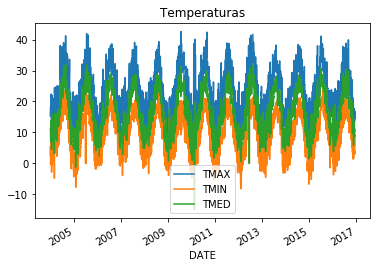

In [39]:
# Pintar la temperatura máx, min, med
data.plot(y=["TMAX", "TMIN", "TMED"])
plt.title('Temperaturas')

Pintar datos para una fecha.

#### barras

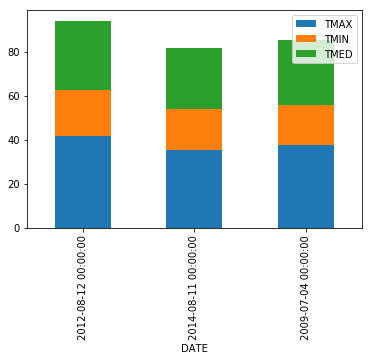

In [40]:
data.iloc[[1,100,20], [0,1, 2]].plot(kind='bar', stacked=True)

#### cajas

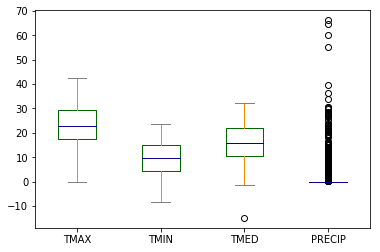

In [41]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange', medians='DarkBlue', caps='Gray')
data.plot.box(color=color)

### Visualizaciones especiales

#### scatter

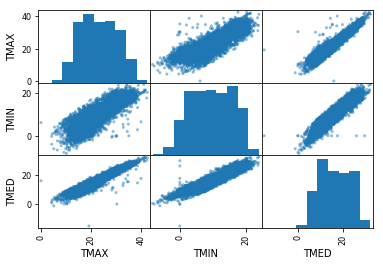

In [42]:
# scatter_matrix
from pandas.plotting import scatter_matrix
axes = scatter_matrix(data.loc[:, "TMAX":"TMED"])

---

Hemos aprendido:
* Como leer un CSV con distintos formatos utilizando la librería pandas.
* Como extraer información de la librería los datos cargados.
* Como acceder a los datos cargados.
* Como representar datos con pandas.

###### Juan Luis Cano, Alejandro Sáez, Mabel Delgado

---
_Las siguientes celdas contienen configuración del Notebook_

_Para visualizar y utlizar los enlaces a Twitter el notebook debe ejecutarse como [seguro](http://ipython.org/ipython-doc/dev/notebook/security.html)_

    File > Trusted Notebook

In [43]:
# Esta celda da el estilo al notebook
from IPython.core.display import HTML
css_file = '../style/style.css'
HTML(open(css_file, "r").read())